[scikit-learn參考連結](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)<br>

![](https://morvanzhou.github.io/static/results/sklearn/2_1_1.png)<hr>
![](http://ofnqcf09s.bkt.clouddn.com/4.png)<hr>
![](http://ofnqcf09s.bkt.clouddn.com/6.png)

# 1.Basic

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [14]:
iris = datasets.load_iris()
iris_X = iris.data
iris_Y = iris.target

# print(iris_X[:][:5])
# print(iris_Y)

X_train, X_test, Y_train, Y_test = train_test_split(iris_X,iris_Y,test_size=0.3)

## KNN

In [21]:
# knn模塊建置
knn = KNeighborsClassifier()

# 餵入訓練資料
knn.fit(X_train,Y_train)

# 預測測試資料
print('預測:',knn.predict(X_test))

print('真值:',Y_test)

預測: [1 1 2 2 2 1 0 1 0 0 0 2 0 2 1 1 1 1 2 0 1 2 1 2 0 2 1 0 2 0 2 0 1 2 2 0 1
 1 0 0 0 0 2 1 0]
真值: [1 1 2 2 1 1 0 1 0 0 0 2 0 2 1 1 1 1 2 0 1 2 1 2 0 2 1 0 2 0 2 0 1 2 2 0 1
 1 0 0 0 0 2 1 0]


## LinearRegression 線性回歸

In [30]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [31]:
boston = datasets.load_boston()
boston_x = boston.data
boston_y = boston.target

model = LinearRegression()

#餵入訓練資料
model.fit(boston_x,boston_y)

#預測資料
print(model.predict(boston_x[:5,:]))
print(boston_y[:5])

[ 30.00821269  25.0298606   30.5702317   28.60814055  27.94288232]
[ 24.   21.6  34.7  33.4  36.2]


In [48]:
# y = ax + b
# 每個參數的斜率 a
print(model.coef_)

# 與y軸焦點 b
print(model.intercept_)

# 查看模型參數值
print(model.get_params())

# 模型評分 R^2 coefficient of determination
print(model.score(boston_x,boston_y))

[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
36.4911032804
{'fit_intercept': True, 'normalize': False, 'copy_X': True, 'n_jobs': 1}
0.740607742865


## 創造虛擬數據 回歸數據

In [33]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

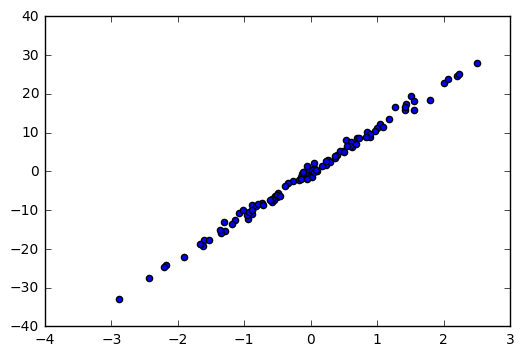

In [43]:
# n_sample 樣本數量, n_features 參數數量, n_targets=目標數量, noise 樣本離散值
X,y = datasets.make_regression(n_samples=100,n_features=1,n_targets=1,noise=1)
plt.scatter(X,y)
plt.show()

# 2.Advanced

## (1)normalization(scale)正規化

In [4]:
# 正規化數據套件
from sklearn import preprocessing
import numpy as np

# 將資料分割成 train與 test的套件
from sklearn.model_selection import train_test_split

# 產生適合做 classification(分類)資料的套件
from sklearn.datasets.samples_generator import make_classification 

# Support Vector Machine中的Support Vector Classifier(支援向量機)
from sklearn.svm import SVC 

# 視覺化套件
import matplotlib.pyplot as plt 

In [2]:
# 建立Array
a = np.array([[10, 2.7, 3.6],
             [-100, 5, -2],
             [120, 20, 40]],dtype=np.float64)

print(a)
# 正規化
print(preprocessing.scale(a))

[[  10.     2.7    3.6]
 [-100.     5.    -2. ]
 [ 120.    20.    40. ]]
[[ 0.         -0.85170713 -0.55138018]
 [-1.22474487 -0.55187146 -0.852133  ]
 [ 1.22474487  1.40357859  1.40351318]]


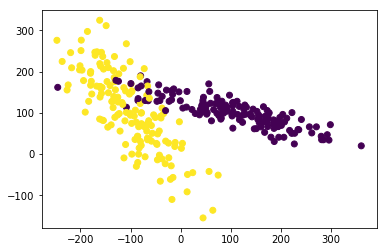

In [23]:
# 產生300筆資料, 2個屬性, 0個非相關屬性, 2個相關屬性, 隨機種子22, 叢集數1, 
X, y = make_classification(
    n_samples=300, n_features=2,
    n_redundant=0, n_informative=2, 
    random_state=22, n_clusters_per_class=1, 
    scale=100)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## 無正規化

In [30]:
# 分訓練(train)與測試(test)資料
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=.3)

# 建立支援向量機
clf = SVC()

# 訓練模型
clf.fit(X_train,Y_train)

# 測試分數
print(clf.score(X_test, Y_test))

0.511111111111


## 正規化

In [31]:
# 自訂正規化範圍
# X = preprocessing.minmax_scale(X, feature_range=(-1,1))

# 正規化
X = preprocessing.scale(X)

# 分訓練(train)與測試(test)資料
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=.3)

# 建立支援向量機
clf = SVC()

# 訓練模型
clf.fit(X_train,Y_train)

# 測試分數
print(clf.score(X_test, Y_test))

0.988888888889


## (2)cross-validation交叉驗證
### 基礎驗證

In [32]:
# iris數據集
from sklearn.datasets import load_iris
# 分割數據套件
from sklearn.model_selection import train_test_split
# kNN，k-NearestNeighbor分類演算法
from sklearn.neighbors import KNeighborsClassifier

# 載入iris數據
iris = load_iris()
X = iris.data
y = iris.target

# 分割數據
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# 建立模型
knn = KNeighborsClassifier(n_neighbors=5)

# 訓練模型
knn.fit(X_train, y_train)

# 模型分數
print(knn.score(X_test, y_test))

0.973684210526


### 交叉驗證(Model validation)

In [38]:
# kNN交叉驗證評估分數套件
from sklearn.model_selection import cross_val_score

# 使用kNN交叉驗證套件
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

# 印出5次分數
print(scores)

# 5次分屬取平均
print(scores.mean())

[ 0.9478022   0.9558011   0.96657382  0.98039216  0.96338028]
0.962789911497


### 交叉驗證2(learning_curve)

[ 0.99440994  0.99776675  0.99888337  0.99917287  0.99888337]
[ 0.83267942  0.91940142  0.96160959  0.97113971  0.97832635]


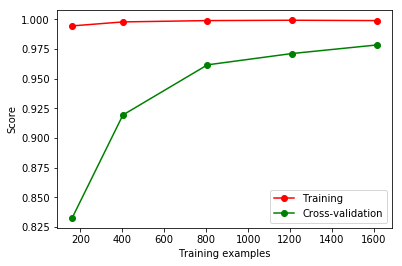

In [76]:
# 學習曲線套件
from sklearn.model_selection import learning_curve
# digits數據庫
from sklearn.datasets import load_digits
#Support Vector Classifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target

# 訓練相對數量  訓練得分    測試得分
# learning_curve(model,訓練屬性,目標屬性,cv拆組數,訓練比例)
train_sizes, train_score, test_score = learning_curve(
    SVC(gamma=0.001), X, y, cv=10,
    train_sizes=[0.1, 0.25, 0.5, 0.75, 1])

# 平均每一輪得分(共5輪,分別10%,25%,50%,75%,100%)
train_score_mean = train_score.mean(axis=1) #對每一列作平均
test_score_mean = test_score.mean(axis=1)

print(train_score_mean)
print(test_score_mean)

# plot(x軸,y軸,標記,顏色)
plt.plot(train_sizes, train_score_mean, 'o-', color="r",
         label="Training")
plt.plot(train_sizes, test_score_mean, 'o-', color="g",
        label="Cross-validation")

# X與Y軸標籤
plt.xlabel("Training examples")
plt.ylabel("Score")
# 圖示
plt.legend(loc="best")
# 呈現
plt.show()

### 交叉驗證3(validation_curve)
    快速找出參數對模型的影響

[ 0.12033875  0.91300577  0.97650449  0.99802102  1.        ]
[ 0.12061127  0.88927074  0.95155412  0.97776513  0.92767856]
[  1.00000000e-06   8.41395142e-06   7.07945784e-05   5.95662144e-04
   5.01187234e-03]


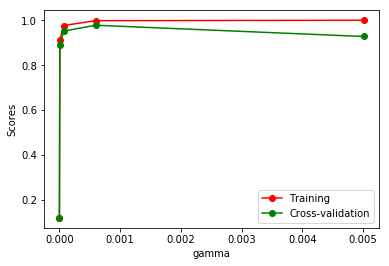

In [79]:
# 驗證曲線套件
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits 
from sklearn.svm import SVC 
import matplotlib.pyplot as plt 
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target

# 建立參數範圍
param_range = np.logspace(-6, -2.3, 5)

#使用validation_curve快速找出參數對模型的影響
#validation_curve(Model, 訓練屬性, 目標屬性, 參數名稱, 參數範圍, 組數)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name='gamma',param_range=param_range,cv=10)

#平均每一轮的平均方差
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

print(train_scores_mean)
print(test_scores_mean)
print(param_range)

#可视化图形
plt.plot(param_range, train_scores_mean, 'o-', color="r",
         label="Training")
plt.plot(param_range, test_scores_mean, 'o-', color="g",
        label="Cross-validation")

plt.xlabel("gamma")
plt.ylabel("Scores")
plt.legend(loc="best")
plt.show()

## (3)保存模型

In [80]:
# 建立模型
from sklearn import svm
from sklearn import datasets

clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Method 1 : pickle

In [87]:
import pickle

In [88]:
# Save
with open('save/clf.pickle','wb') as f:
    pickle.dump(clf, f)

In [89]:
# Restore
with open('save/clf.pickle','rb') as f:
    clf2 = pickle.load(f)
    print(clf2.predict(X[:2]))

[0 0]


### Method 2 : joblib (better)

In [91]:
from sklearn.externals import joblib

In [92]:
# Save
joblib.dump(clf,'save/clf.pkl')

['save/clf.pkl']

In [93]:
# Restore
clf3 = joblib.load('save/clf.pkl')
print(clf3.predict(X[:2]))

[0 0]
